In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, ReLU
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Lambda

***Building the Convolution Block***

In [131]:
def convolution_operation(entered_input, filters=64):
    # Applying two sets of Convolution + ReLU activations
    x = Conv2D(filters, (3, 3), padding='valid')(entered_input)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='valid')(x)
    x = Activation('relu')(x)
    return x

***Constructing the encoder and decoder blocks***

In [132]:
def encoder_block(inputs, num_filters):
    # Encoder block: Convolution operations followed by Max Pooling
    x = convolution_operation(inputs, num_filters)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    return x

In [133]:
def decoder_block(inputs, skip_features, num_filters):
    # Decoder block: Upsampling, feature resizing, and concatenation with skip features
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding='valid')(inputs)
    skip_features = Lambda(lambda sk: tf.image.resize(sk[0], (sk[1].shape[1], sk[1].shape[2])))((skip_features, x))
    x = Concatenate()([x, skip_features])
    x = convolution_operation(x, num_filters)
    return x

***Construct the U-Net architecture***

In [134]:
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = Input(input_shape)

    # Encoder path
    s1 = encoder_block(inputs, 64)
    s2 = encoder_block(s1, 128)
    s3 = encoder_block(s2, 256)
    s4 = encoder_block(s3, 512)

    # Bottleneck
    b = convolution_operation(s4, 1024)

    # Decoder path
    d1 = decoder_block(b, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), padding="same", activation="sigmoid")(d4)

    model = Model(inputs=inputs, outputs=outputs, name="U-Net")
    return model

***Finalizing the Model***

In [135]:
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 572, 572,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 570, 570,  │      1,792 │ input_layer_17[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_108      │ (None, 570, 570,  │          0 │ conv2d_287[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 568, 568,  │     36,928 │ activation_108[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_109      │ (None, 568, 568,  │          0 │ conv2d_288[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_68    │ (None, 284, 284,  │          0 │ activation_109[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_289 (Conv2D) │ (None, 282, 282,  │     73,856 │ max_pooling2d_68… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_110      │ (None, 282, 282,  │          0 │ conv2d_289[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_290 (Conv2D) │ (None, 280, 280,  │    147,584 │ activation_110[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_111      │ (None, 280, 280,  │          0 │ conv2d_290[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_69    │ (None, 140, 140,  │          0 │ activation_111[0… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_291 (Conv2D) │ (None, 138, 138,  │    295,168 │ max_pooling2d_69… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_112      │ (None, 138, 138,  │          0 │ conv2d_291[0][0]  │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_292 (Conv2D) │ (None, 136, 136,  │    590,080 │ activation_112[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_113      │ (None, 136, 136,  │          0 │ conv2d_292[0][0]  │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_70    │ (None, 68, 68,    │          0 │ activation_113[0… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_293 (Conv2D) │ (None, 66, 66,    │  1,180,160 │ max_pooling2d_70

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# tf.keras.utils.plot_model(model, "model.png", show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [137]:
import numpy as np
from PIL import Image 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Load the image 
img = Image.open('images/PP_DogImages_1_930x696.jpg') 

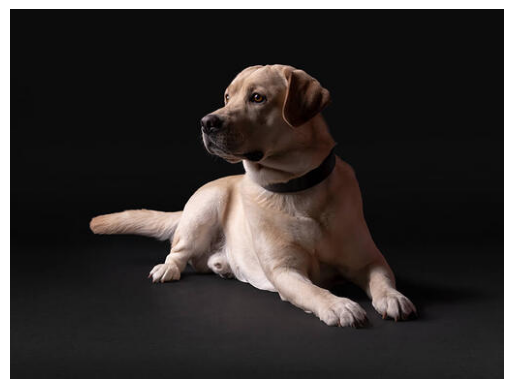

In [138]:
# Display the image
plt.imshow(img)
plt.axis('off') 
plt.show()

In [139]:
# Preprocess the image
img = img.resize((572, 572)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array[:,:,:3], axis=0) 
img_array = img_array / 255

In [140]:
# Load the model 
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 

In [141]:
# Make predictions 
predictions = model.predict(img_array) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


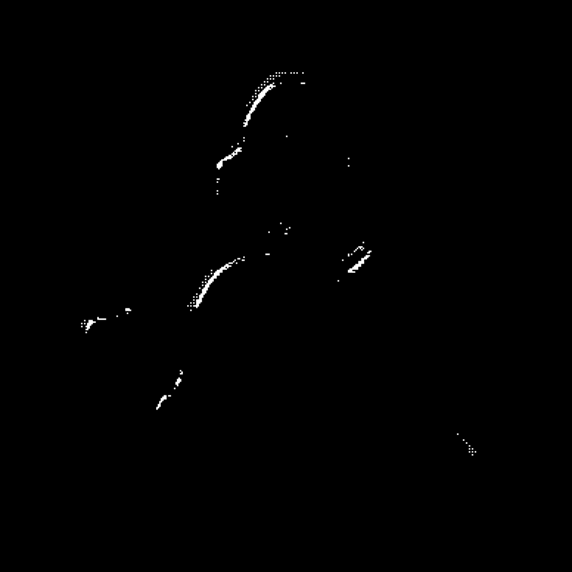

In [142]:
# Convert predictions to a numpy array and resize to original image size 
predictions = np.squeeze(predictions, axis=0) 
predictions = np.argmax(predictions, axis=-1) 
predictions = Image.fromarray(np.uint8(predictions*255)) 
predictions = predictions.resize((img.width, img.height)) 
# Save the predicted image 
predictions.save('images/predicted_dog.jpg') 
predictions